In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [4]:
alpha = 1.0

n = 100
p = 1000
n_groups = int(p/1)
seed = 0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(
    n, p, n_groups, rho=0, svd_transform=True
).values()

# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(
    X, y, groups, group_sizes, alpha, 
    log10_min_ratio=-2, 
    max_cds=int(1e5),
    newton_max_iters=10000,
)

In [5]:
pack

CommonPack(groups=array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176,

In [6]:
pack1 = deepcopy(pack)
pack2 = deepcopy(pack)
pack3 = deepcopy(pack)

In [7]:
%%time
gl_out = group_lasso(X, pack1, fit_type='data')

CPU times: user 304 ms, sys: 454 ms, total: 758 ms
Wall time: 186 ms


In [8]:
%%time
gl_out2 = group_lasso(X, pack2, fit_type='data_newton')

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 132 ms


In [9]:
A = np.asfortranarray(X.T @ X)

In [10]:
%%time
gl_out3 = group_lasso(A, pack3, fit_type='full_cov')

CPU times: user 91.5 ms, sys: 0 ns, total: 91.5 ms
Wall time: 91.4 ms


In [11]:
gl_out['rsqs'] / np.linalg.norm(y) ** 2,  gl_out2['rsqs'] / np.linalg.norm(y) ** 2

(array([0.        , 0.01281298, 0.0326524 , 0.05072934, 0.06720038,
        0.09143169, 0.11949374, 0.1481074 , 0.17713542, 0.2053913 ,
        0.23922857, 0.27536918, 0.31344787, 0.34950532, 0.38501625,
        0.4200617 , 0.45531791, 0.48836386, 0.5211584 , 0.5528097 ,
        0.58283973, 0.6108145 , 0.63643168, 0.66041446, 0.6834815 ,
        0.70573676, 0.72716851, 0.74724486, 0.7660649 , 0.78354683,
        0.79967573, 0.81464068, 0.82836831, 0.84132784, 0.85364375,
        0.86510733, 0.87585987, 0.88591697, 0.89512827, 0.90359465,
        0.91131892, 0.91841108, 0.92493413, 0.93103152, 0.93674327,
        0.94196783, 0.94676396, 0.95115894, 0.95516386, 0.95881301,
        0.96223251, 0.96543247, 0.96834682, 0.97102177, 0.97348029,
        0.97576746, 0.9778539 , 0.97977796, 0.98156121, 0.98318877,
        0.98467199, 0.98601802, 0.98723938, 0.98835067, 0.98937499,
        0.99030869, 0.99115946, 0.99193461, 0.99264211, 0.9932883 ,
        0.99387866, 0.99441631, 0.99490613, 0.99

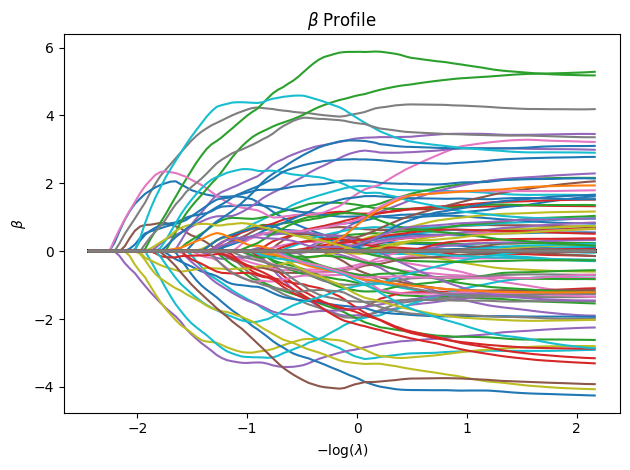

In [12]:
min_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]
max_idx = np.unravel_index(np.argmax(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == min_idx or j == max_idx: continue
    plt.plot(-np.log(gl_out['lmdas']), gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()

In [19]:
np.max(gl_out['betas']-gl_out3['betas']), np.max(gl_out2['betas'] - gl_out3['betas'])

(3.885780586188048e-16, 9.59290258339962e-10)